<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [1]:
# Step 1: Download the dataset
#!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



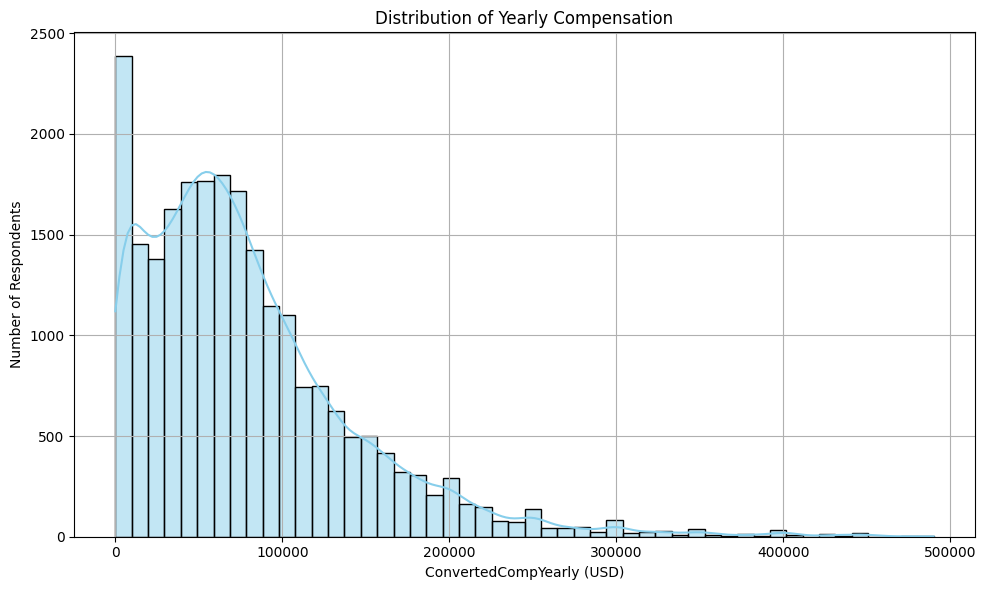

In [3]:
## Write your code here
import seaborn as sns

# Drop missing values and optionally filter extreme outliers
comp_data = df['ConvertedCompYearly'].dropna()
comp_data = comp_data[comp_data < 500000]  # Optional: filter out extreme outliers

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(comp_data, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Yearly Compensation')
plt.xlabel('ConvertedCompYearly (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



In [4]:
# Mapping categorical age ranges to approximate midpoints
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Apply mapping
df['AgeNumeric'] = df['Age'].map(age_mapping)

C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_3164\3998804118.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AgeNumeric', y='ConvertedCompYearly', data=df_box, palette='coolwarm')


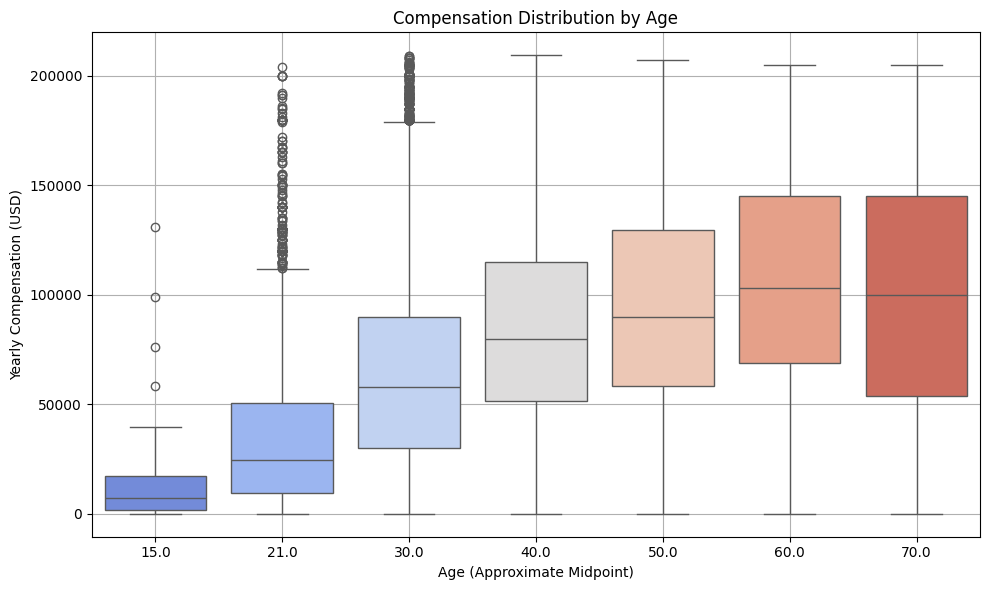

In [5]:
## Write your code here

# Drop nulls for clean plotting
df_box = df.dropna(subset=['AgeNumeric', 'ConvertedCompYearly'])

# Optional: remove extreme outliers
df_box = df_box[df_box['ConvertedCompYearly'] < df_box['ConvertedCompYearly'].quantile(0.95)]

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeNumeric', y='ConvertedCompYearly', data=df_box, palette='coolwarm')
plt.title('Compensation Distribution by Age')
plt.xlabel('Age (Approximate Midpoint)')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



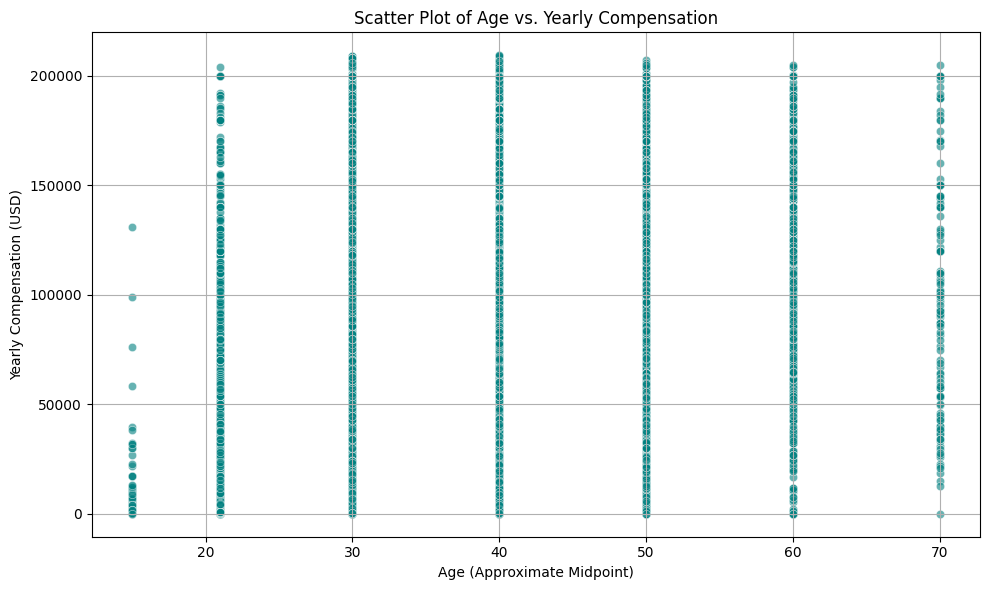

In [9]:
## Write your code here


# Clean data: remove missing and extreme compensation outliers
df_scatter = df.dropna(subset=['AgeNumeric', 'ConvertedCompYearly'])
df_scatter = df_scatter[df_scatter['ConvertedCompYearly'] < df_scatter['ConvertedCompYearly'].quantile(0.95)]

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scatter, x='AgeNumeric', y='ConvertedCompYearly', alpha=0.6, color='teal')
plt.title('Scatter Plot of Age vs. Yearly Compensation')
plt.xlabel('Age (Approximate Midpoint)')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


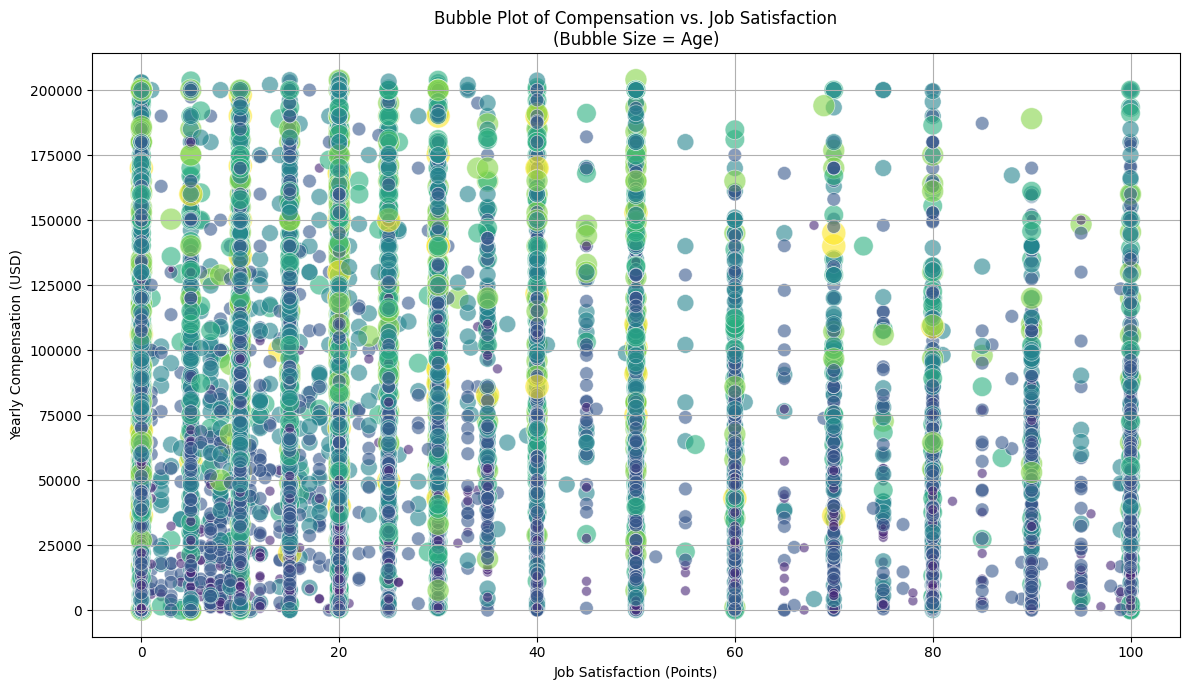

In [11]:
## Write your code here

# Filter relevant data and clean
df_bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNumeric']].dropna()
df_bubble = df_bubble[df_bubble['ConvertedCompYearly'] < df_bubble['ConvertedCompYearly'].quantile(0.95)]

# Create bubble plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_bubble,
    x='JobSatPoints_6',
    y='ConvertedCompYearly',
    size='AgeNumeric',
    sizes=(20, 300),  # control min and max bubble sizes
    hue='AgeNumeric',
    palette='viridis',
    alpha=0.6,
    legend=False
)

plt.title('Bubble Plot of Compensation vs. Job Satisfaction\n(Bubble Size = Age)')
plt.xlabel('Job Satisfaction (Points)')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_3164\2916506005.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mainbranch_counts.values, y=mainbranch_counts.index, palette="coolwarm")


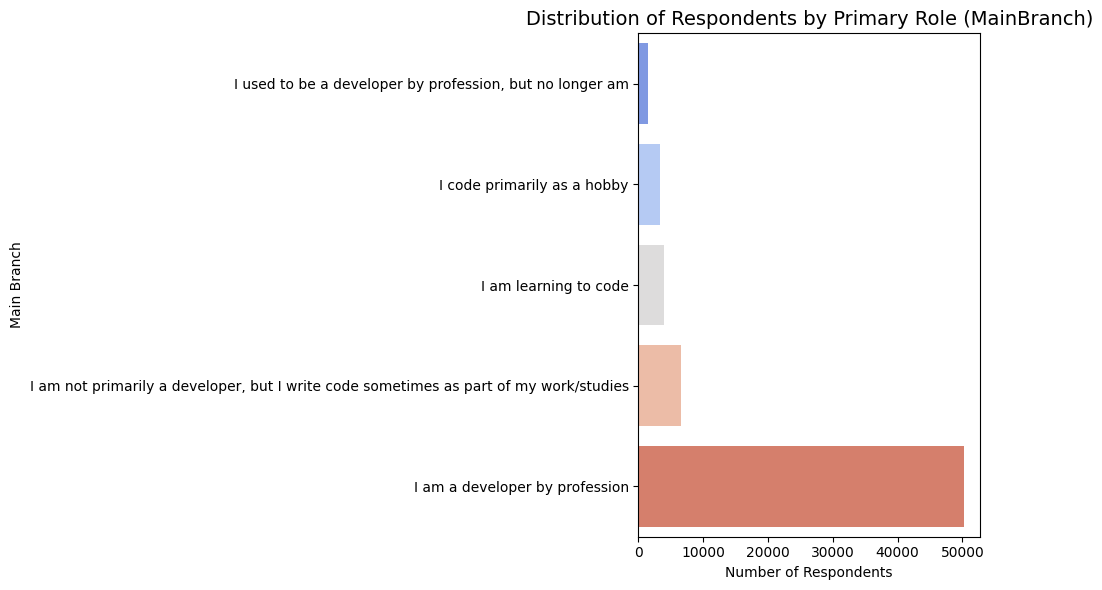

In [13]:
## Write your code here

# Count values in MainBranch
mainbranch_counts = df['MainBranch'].value_counts().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=mainbranch_counts.values, y=mainbranch_counts.index, palette="coolwarm")

plt.title('Distribution of Respondents by Primary Role (MainBranch)', fontsize=14)
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_3164\3173546944.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_langs, x='Language', y='Count', palette='mako')


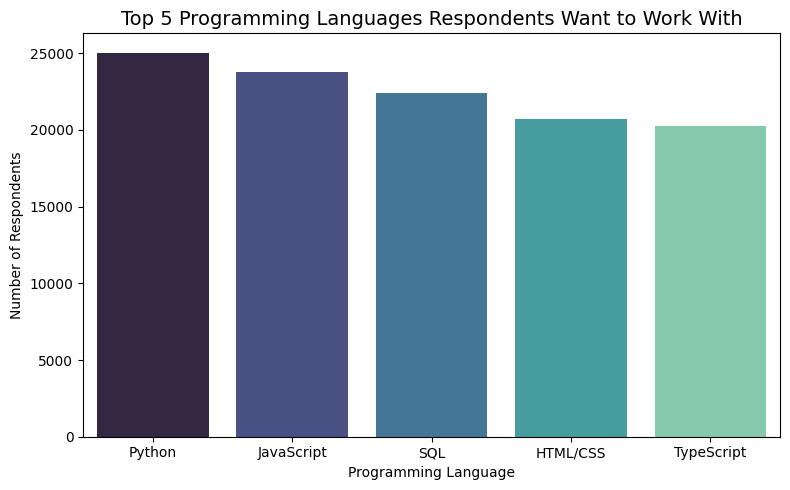

In [14]:
## Write your code here

# Drop NaNs and split language strings
df_lang = df['LanguageWantToWorkWith'].dropna().str.split(';')

# Explode the list into individual rows
df_lang_exploded = df_lang.explode().str.strip()

# Count frequencies and get top 5
top5_langs = df_lang_exploded.value_counts().head(5).reset_index()
top5_langs.columns = ['Language', 'Count']

# Plot vertical bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=top5_langs, x='Language', y='Count', palette='mako')

plt.title('Top 5 Programming Languages Respondents Want to Work With', fontsize=14)
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()



C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_22872\2646385467.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_langs_want, x='Language', y='Count', palette='mako')


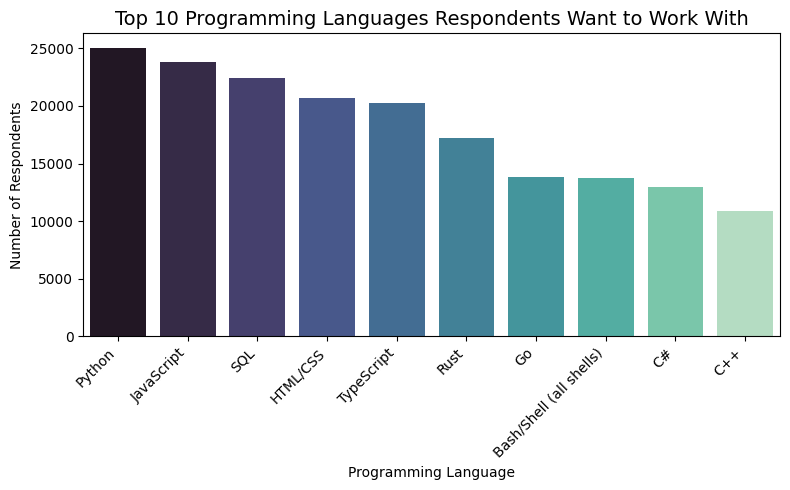

In [14]:
# TOP 10 PROGRMING LANGUAGES WANT TO WORK WITH

# Drop NaNs and split language strings
df_lang = df['LanguageWantToWorkWith'].dropna().str.split(';')

# Explode the list into individual rows
df_lang_exploded = df_lang.explode().str.strip()

# Count frequencies and get top 5
top10_langs_want = df_lang_exploded.value_counts().head(10).reset_index()
top10_langs_want.columns = ['Language', 'Count']

# Plot vertical bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=top10_langs_want, x='Language', y='Count', palette='mako')

plt.title('Top 10 Programming Languages Respondents Want to Work With', fontsize=14)
plt.xlabel('Programming Language')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_22872\2513433818.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_langs_current, x='Language', y='Count', palette='mako')


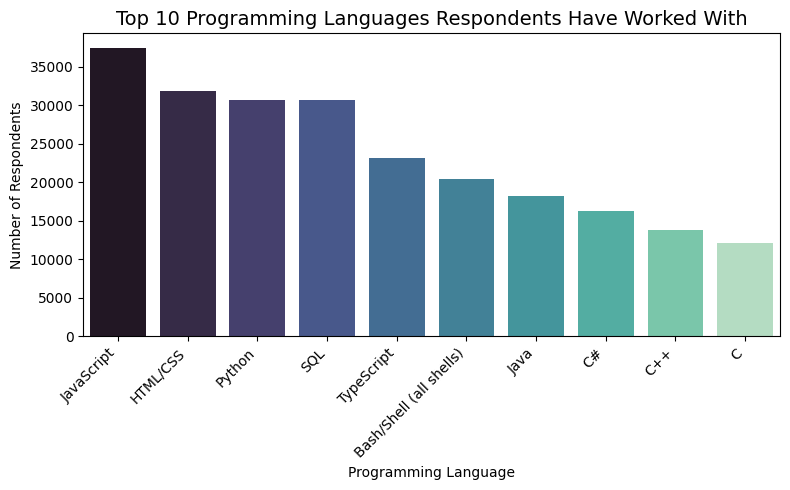

In [15]:
# TOP 10 PROGRMING LANGUAGES HAVE WORKED WITH

# Drop NaNs and split language strings
df_lang = df['LanguageHaveWorkedWith'].dropna().str.split(';')

# Explode the list into individual rows
df_lang_exploded = df_lang.explode().str.strip()

# Count frequencies and get top 5
top10_langs_current = df_lang_exploded.value_counts().head(10).reset_index()
top10_langs_current.columns = ['Language', 'Count']

# Plot vertical bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=top10_langs_current, x='Language', y='Count', palette='mako')

plt.title('Top 10 Programming Languages Respondents Have Worked With', fontsize=14)
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


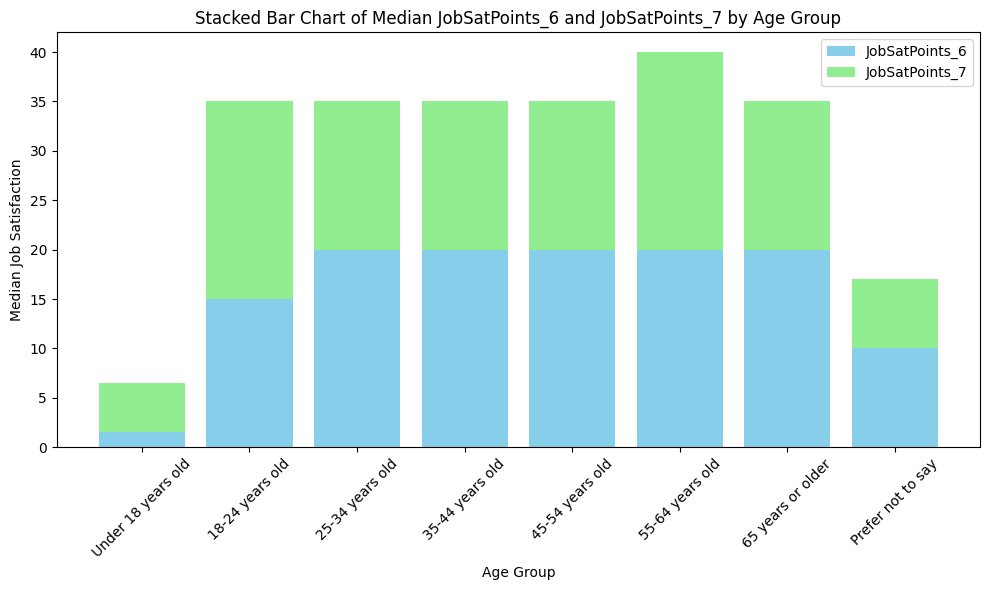

In [15]:
## Write your code here
# Ensure 'Age' is a categorical column
df_filtered = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# Group by Age and calculate medians
age_grouped = df_filtered.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Sort age categories manually (optional but improves readability)
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say'
]
age_grouped = age_grouped.reindex(age_order)

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_grouped.index, age_grouped['JobSatPoints_6'], label='JobSatPoints_6', color='skyblue')
plt.bar(age_grouped.index, age_grouped['JobSatPoints_7'], bottom=age_grouped['JobSatPoints_6'], label='JobSatPoints_7', color='lightgreen')

plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction')
plt.title('Stacked Bar Chart of Median JobSatPoints_6 and JobSatPoints_7 by Age Group')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



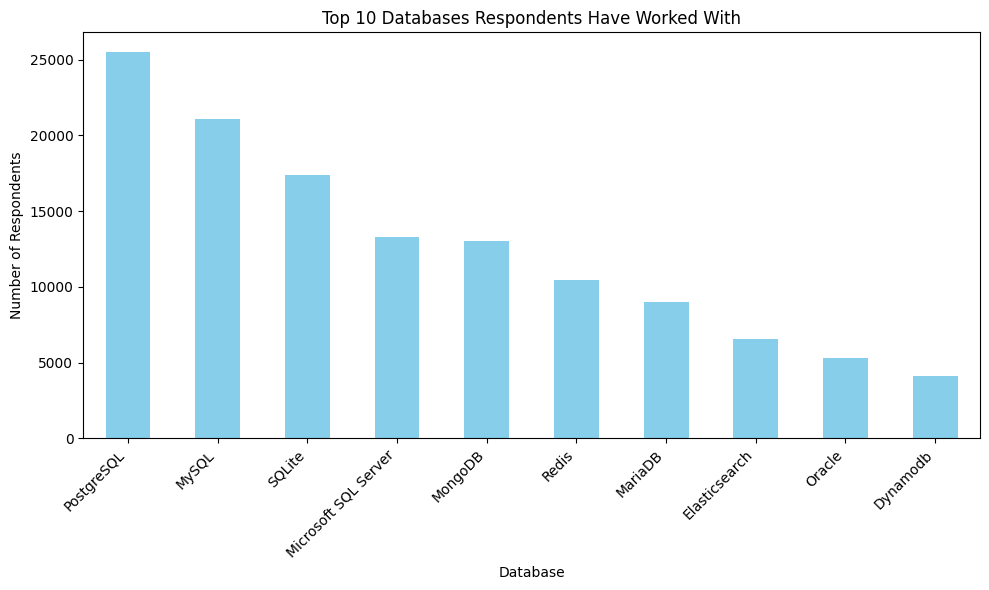

In [ ]:
# TOP 10 DATABASES HAVE WORKED WITH

## Write your code here
# Drop missing values in 'DatabaseHaveWorkedWith'
df_db = df[['DatabaseHaveWorkedWith']].dropna()

# Split multiple databases in one cell
db_series = df_db['DatabaseHaveWorkedWith'].str.split(';').explode()

# Count each database
db_counts = db_series.value_counts().head(10)  # Top 10 databases (optional)

# Plot the bar chart
plt.figure(figsize=(10, 6))
db_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Databases Respondents Have Worked With')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


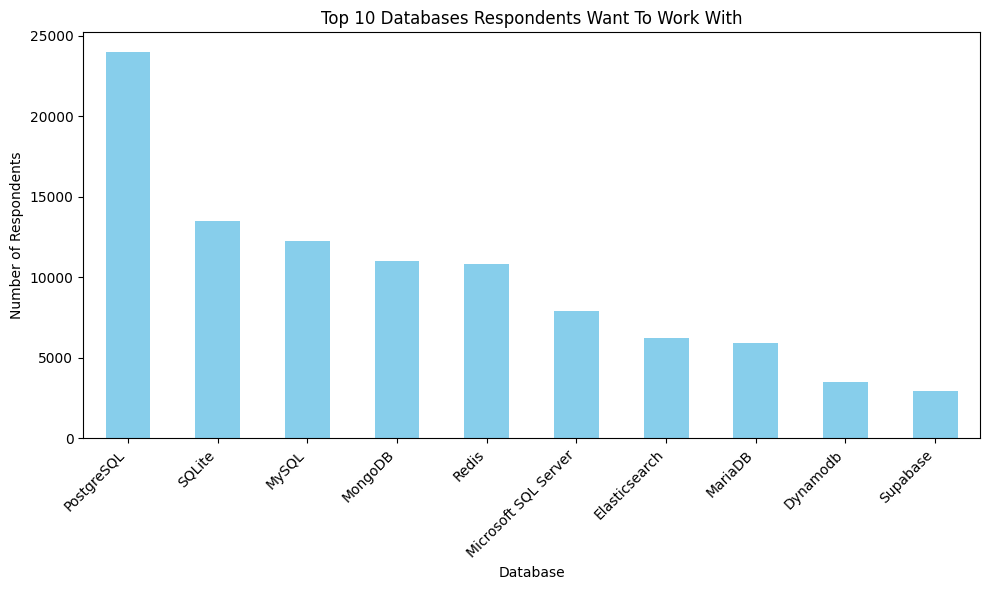

In [19]:
# TOP 10 DATABASES WANT TO WORK WITH
# Drop missing values in 'DatabaseHaveWorkedWith'
df_db = df[['DatabaseWantToWorkWith']].dropna()

# Split multiple databases in one cell
db_series_future = df_db['DatabaseWantToWorkWith'].str.split(';').explode()

# Count each database
db_counts_future = db_series.value_counts().head(10)  # Top 10 databases (optional)

# Plot the bar chart
plt.figure(figsize=(10, 6))
db_counts_future.plot(kind='bar', color='skyblue')
plt.title('Top 10 Databases Respondents Want To Work With')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



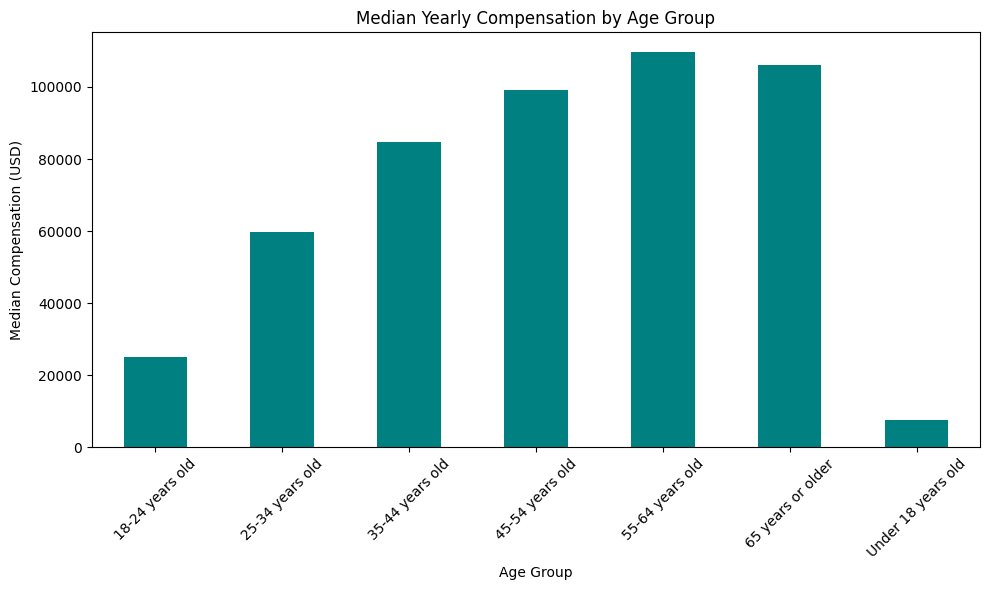

In [17]:
## Write your code here

# Ensure 'Age' is treated consistently (no missing/unknowns)
df_agecomp = df[['Age', 'ConvertedCompYearly']].dropna()
df_agecomp = df_agecomp[df_agecomp['Age'] != 'Prefer not to say']

# Group by Age and calculate median compensation
median_comp_by_age = df_agecomp.groupby('Age')['ConvertedCompYearly'].median().sort_index()

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
median_comp_by_age.plot(kind='bar', color='teal')

plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



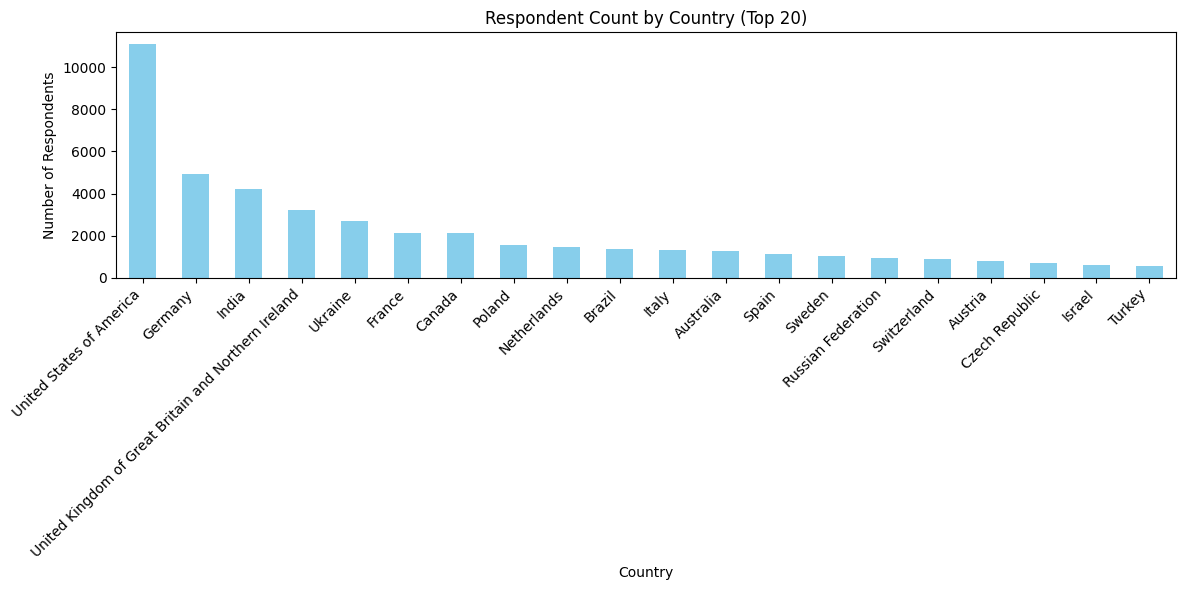

In [18]:
## Write your code here

# Count respondents by country
country_counts = df['Country'].value_counts().head(20)  # Top 20 countries

# Plot bar chart
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='skyblue')

plt.title('Respondent Count by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_22872\458389010.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_webframe_current, x='Web FrameWork', y='Count', palette='crest')


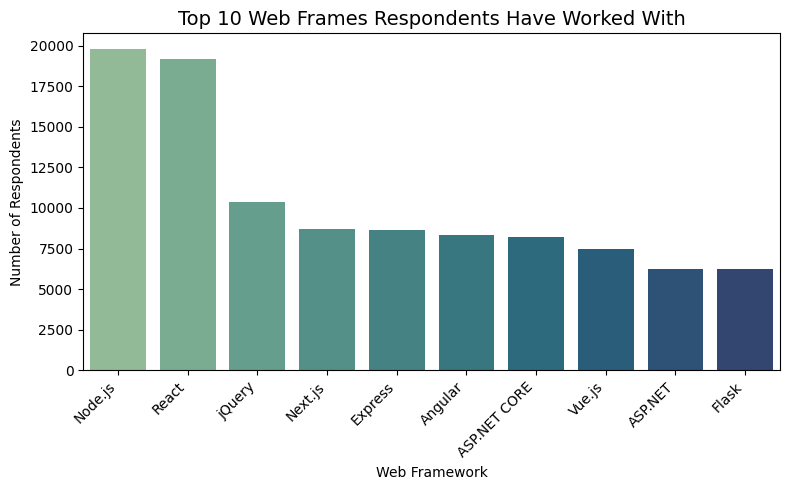

In [21]:
# TOP 10 WEB FRAMEWORKS HAVE WORKED WITH
# Drop NaNs and split language strings
df_webframe = df['WebframeHaveWorkedWith'].dropna().str.split(';')

# Explode the list into individual rows
df_webframe_exploded = df_webframe.explode().str.strip()

# Count frequencies and get top 5
top10_webframe_current = df_webframe_exploded.value_counts().head(10).reset_index()
top10_webframe_current.columns = ['Web FrameWork', 'Count']

# Plot vertical bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=top10_webframe_current, x='Web FrameWork', y='Count', palette='crest')

plt.title('Top 10 Web Frames Respondents Have Worked With', fontsize=14)
plt.xlabel('Web Framework')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_22872\2635611721.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_webframe_future, x='Web FrameWork', y='Count', palette='crest')


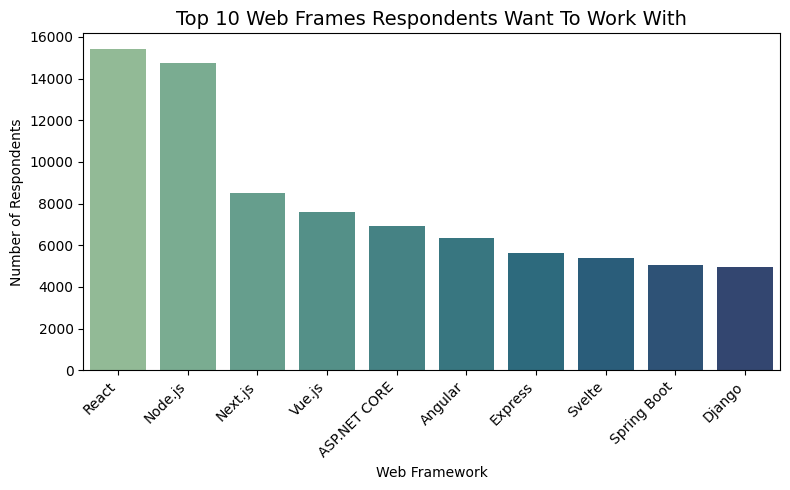

In [22]:
# TOP 10 WEB FRAMEWORKS WANT TO WORK WITH
# Drop NaNs and split language strings
df_webframe_want = df['WebframeWantToWorkWith'].dropna().str.split(';')

# Explode the list into individual rows
df_webframe_want_exploded = df_webframe_want.explode().str.strip()

# Count frequencies and get top 5
top10_webframe_future = df_webframe_want_exploded.value_counts().head(10).reset_index()
top10_webframe_future.columns = ['Web FrameWork', 'Count']

# Plot vertical bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=top10_webframe_future, x='Web FrameWork', y='Count', palette='crest')

plt.title('Top 10 Web Frames Respondents Want To Work With', fontsize=14)
plt.xlabel('Web Framework')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
